# Simple Black-box Adversarial Attacks

Paper link: https://arxiv.org/abs/1905.07121

In [1]:
from bat.attacks import SimBA
from bat.apis.deepapi import VGG16Cifar10

In [2]:
import numpy as np
np.set_printoptions(suppress=True)

from PIL import Image

## Step 1: Load image and make predictions

In [3]:
# Load Image ranging from [0.0, 1.0]
x = np.asarray(Image.open("dog.jpg").resize((32, 32))) / 255.0

In [4]:
from matplotlib.pyplot import imshow
%matplotlib inline

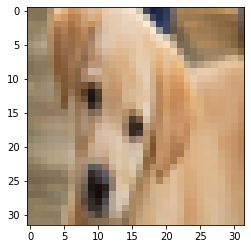

In [5]:
imshow(np.asarray(x))

In [6]:
# Initialize the DeepAPI Model
model = VGG16Cifar10("https://api.wuhanstudio.uk" + "/vgg16_cifar10")

In [7]:
# Get Preditction
y_pred = model.predict(np.array([x]))[0]

# Print result
model.print(y_pred)
print()
print('Prediction', np.argmax(y_pred), model.get_class_name(np.argmax(y_pred)))

airplane       0.00001
automobile     0.00001
bird           0.00003
cat            0.00002
deer           0.00003
dog            0.99964
frog           0.00001
horse          0.00024
ship           0.00000
truck          0.00001

Prediction 5 dog


## Step 2: Apply the SimpleBA Attack

In [8]:
simba = SimBA()
x_adv = simba.attack(x, model)

0 0.999701201915741 0.09999999999999998
1 0.9996751546859741 0.14142135623730948
3 0.9996483325958252 0.17320508075688767
4 0.999543309211731 0.19999999999999996
6 0.9995017051696777 0.2236067977499789
7 0.999431312084198 0.24494897427831777
8 0.999419093132019 0.264575131106459
10 0.9992103576660156 0.282842712474619
15 0.9992097616195679 0.3
17 0.9991853833198547 0.31622776601683794
18 0.9991084933280945 0.33166247903553997
20 0.9990942478179932 0.34641016151377546
22 0.9989808201789856 0.36055512754639896
23 0.9989751577377319 0.37416573867739417
24 0.9989609718322754 0.3872983346207417
26 0.998950719833374 0.39999999999999997
28 0.9989303946495056 0.412310562561766
29 0.9988741278648376 0.4242640687119285
30 0.9988688826560974 0.43588989435406733
31 0.9988572597503662 0.4472135954999579
34 0.9988458156585693 0.45825756949558394
35 0.9988131523132324 0.4690415759823429
36 0.9987803101539612 0.4795831523312719
40 0.9987439513206482 0.4898979485566356
41 0.9987040758132935 0.499999999

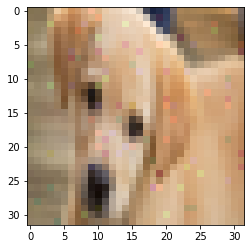

In [9]:
imshow(np.asarray(x_adv))

In [10]:
# Get predictions after attack
y_pred = model.predict(np.array([x_adv]))[0]

# Print result
model.print(y_pred)
print()
print('Prediction', np.argmax(y_pred), model.get_class_name(np.argmax(y_pred)))

airplane       0.00007
automobile     0.00003
bird           0.00047
cat            0.00087
deer           0.00054
dog            0.49124
frog           0.00006
horse          0.50669
ship           0.00001
truck          0.00002

Prediction 7 horse
